## Model Isinga - symulacja Monte Carlo

projekt zaliczeniowy

Założenia: brak

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scienceplots
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

plt.style.use(['science','notebook', 'grid'])

In [80]:
class Ising():
    ''' Symulacja modelu Isinga '''    
    
    def __init__(self, N=10, temp=0.4, J=1):
        self.N = N
        self.temp = temp
        self.J = J
        
    def MetropolisMove(self, config, N, beta):
        ''' Krok metody Monte Carlo przy pomocy 
        algorytmu Metropolis '''
        for i in range(N):
            for j in range(N):            
                # wybór lsowego spinu z sieci
                a = np.random.randint(0,N)
                b = np.random.randint(0,N)
                spin_i =  config[a, b] # początkiowy spin
       
                # Energia
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                dE = 2*nb*spin_i
                
                # if (dE < 0) or (np.rand() < np.exp(-dE*beta)):	
                #     spin_i *= -1 # obracanie spinu

                if (dE < 0):	
                    spin_i *= -1 # obracanie spinu
                elif np.random.random() < np.exp(-dE*beta):
                    spin_i *= -1 # obracanie spinu

                config[a, b] = spin_i
        return config
    
    def GetMagnetization(self, config):
        return np.sum(config)/len(config)**2

    def GetEnergy(self, config):
        '''Energia układu w danym stanie, spiny jedynie oddziałyywują w pierwszej strefie kordynacyjnej'''
        N = len(config)
        energy = 0
        lattice_energy = np.zeros(config.shape)
        for i in range(len(config)):
            for j in range(len(config)):
                S = config[i,j]
                nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
                energy += -self.J*nb*S
                lattice_energy[i,j] = -self.J*nb*S
        return energy/4., lattice_energy 

    def IsConfigStable(self, config):
        return np.abs(self.GetEnergy(config)[0]) == np.size(config)

    def simulate(self):   
        ''' Faktyczna symulacja'''
        config = 2*np.random.randint(2, size=(self.N, self.N))-1
        fig, ax = plt.subplots(figsize=(10, 10), dpi=80)

        ims = []
        for i in range(1000):
            self.MetropolisMove(config, self.N, 1.0/self.temp)
            
            ax.spines['bottom'].set_color('0.5')
            ax.spines['top'].set_color('0.5')
            ax.spines['right'].set_color('0.5')
            ax.spines['left'].set_color('0.5')
            plt.axis('off')
            im = ax.imshow(config, interpolation='nearest', cmap=cm.gray, animated=True)
            ttl = plt.text(0.5, 1.01, "Krok: "+str(i)+"  N="+str(self.N), 
                        horizontalalignment='center', 
                        verticalalignment='bottom', 
                        transform=ax.transAxes,
                        fontsize='xx-large')

            # if self.IsConfigStable(config):
            #     break
            
            ims.append([im, ttl])

    
        animation.ArtistAnimation(fig, ims, 
                                  interval=180, 
                                  blit=True,
                                  repeat_delay=1000).save("Sims\Ising"+str(self.N)+".gif")



In [81]:
rm = Ising()

MovieWriter ffmpeg unavailable; using Pillow instead.


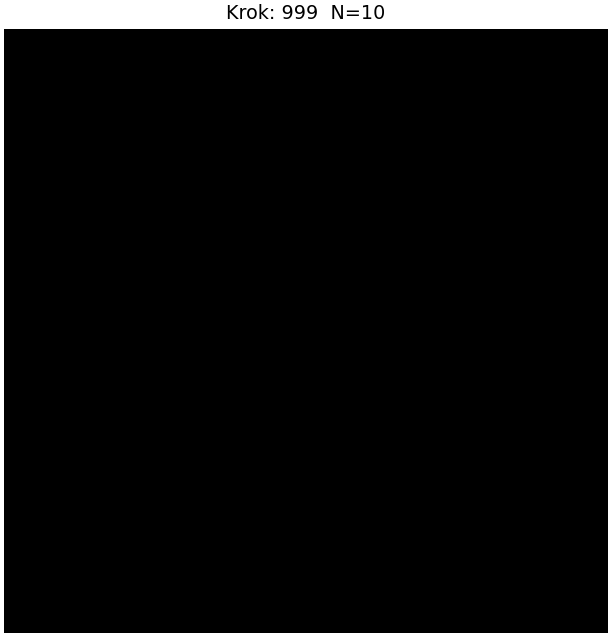

In [82]:
rm.simulate()